# CNN_MODEL

## Importing the libraries

In [ ]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2-D,Dropout,Flatten
from mnist import MNIST
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.models

In [0]:
import load_model
from keras.preprocessing.image import ImageDataGenerator
import sklearn
import random
import math
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [0]:
emnist_data = MNIST(path='../../data', return_type='numpy')
emnist_data.select_emnist('letters')
X, y = emnist_data.load_training()

## Data Visualization

In [7]:
print(X.shape)
print(y.shape)

(124800, 784)
(124800,)


In [0]:
X = X.reshape(-1,28,28)
y = y - 1

#### Dictionary to convert number to character

In [0]:
decoder = {}
for i in range(0,26):
    decoder[i] = chr(97+i)

In [10]:
decoder

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

Label is : g
Label is : d
Label is : d
Label is : l
Label is : u


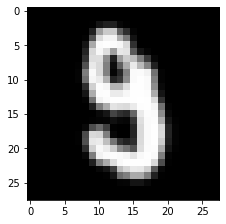

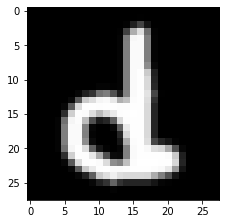

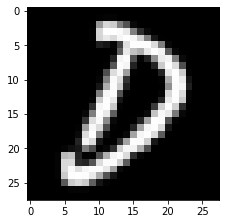

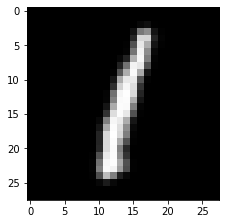

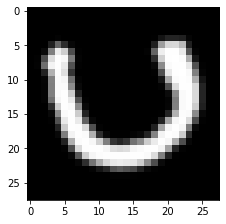

In [11]:
n = 5
for i in range(n):
    plt.figure(figsize=(20,10))
    idx = random.randint(0,len(X))
    ax = plt.subplot(1, n, i + 1)
    print("Label is : "+decoder[y[idx]])
    plt.imshow(X[idx],cmap = 'gray')

## Data Preprocessing

In [0]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(X, y, test_size = 1/10, random_state = 7)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112320, 28, 28)
(12480, 28, 28)
(112320,)
(12480,)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
y_train = keras.utils.to_categorical(y_train, 26)
y_test = keras.utils.to_categorical(y_test, 26)

In [0]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

## Creating image datagenarator

In [0]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = .2,
    zoom_range = .2)

In [0]:
datagen.fit(x_train)

### Model Architecture

In [0]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation = "relu",input_shape = (28,28,1)))
    model.add(Conv2D(32,(3,3),activation = "relu"))
    model.add(MaxPool2D())
    model.add(Dropout(.4))
    model.add(Conv2D(64,(3,3),activation = "relu"))
    model.add(Conv2D(64,(3,3),activation = "relu"))
    model.add(MaxPool2D())
    model.add(Dropout(.4))
    model.add(Flatten())
    model.add(Dense(128,activation="relu"))
    model.add(Dropout(.4))
    model.add(Dense(26,activation = "softmax"))
    return model

In [21]:
model = build_model()
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
def step_decay(epoch, lr):
    drop = 0.9
    epochs_drop = 3.0
    lrate = lr * math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

### Training the model

In [23]:
lrate = LearningRateScheduler(step_decay)
callback_list = [lrate]
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=256),
                    steps_per_epoch=len(x_train) // 256, epochs=15,validation_data = (x_test,y_test),validation_steps = len(x_test) // 256,callbacks=callback_list )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/15





438/438 [==============================] - 50s 115ms/step - loss: 2.0956 - acc: 0.3705 - val_loss: 0.5361 - val_acc: 0.8358
Epoch 2/15
438/438 [==============================] - 44s 100ms/step - loss: 1.1539 - acc: 0.6389 - val_loss: 0.3345 - val_acc: 0.8909
Epoch 3/15
438/438 [==============================] - 44s 100ms/step - loss: 0.9168 - acc: 0.7140 - val_loss: 0.2868 - val_acc: 0.9076
Epoch 4/15
438/438 [==============================] - 44s 100ms/step - loss: 0.8039 - acc: 0.7488 - val_loss: 0.2596 - val_acc: 0.9184
Epoch 5/15
438/438 [==============================] - 44s 100ms/step - loss: 0.7332 - acc: 0.7708 - val_loss: 0.2276 - val_acc: 0.9263
Epoch 6/15
438/438 [==============================] - 43s 99ms/step - loss: 0.6836 - acc: 0.7859 - val_loss: 0.2163 - val_acc: 0.9310
Epoch 7/15
438/438 [==============================] - 43s 98ms/step - loss: 0.6505 - acc:

### Visualizing result

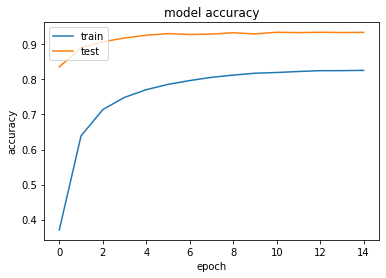

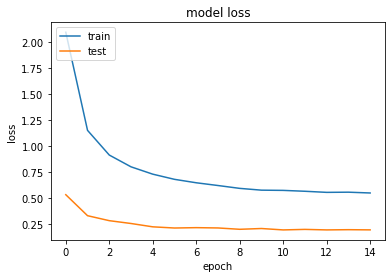

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Saving the model

In [0]:
model = model.save('../../Model/cnn_model_2.h5')